sn-RNA seq expression files after regressing out covariates:
Astrocytes: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Ast_gene_exp.tsv"
Excitatory Neurons: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Ex_gene_exp.tsv"
Inhibitory Neurons: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/In_gene_exp.tsv"
Microglia: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Mic_gene_exp.tsv"
Oligodendrocytes: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Oli_gene_exp.tsv"
Oligodendrocyte precursor cells: "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Opc_gene_exp.tsv"
LDetect region info: "/projects/YangLabData/qliu/cTWAS/ldetect_region.txt" 

In [23]:
import pandas as pd

# 定义每种细胞类型及其对应的文件路径
file_paths = {
    "Astrocytes": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Ast_gene_exp.tsv",
    "Excitatory_Neurons": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Ex_gene_exp.tsv",
    "Inhibitory_Neurons": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/In_gene_exp.tsv",
    "Microglia": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Mic_gene_exp.tsv",
    "Oligodendrocytes": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Oli_gene_exp.tsv",
    "OPCs": "/projects/YangLabData/qliu/TIGAR/input/single_cell/1st_step/Refreshed/Opc_gene_exp.tsv"
}

# 用一个字典存储每个细胞类型对应的表达矩阵
expression_data = {}

# 遍历文件并读取
for cell_type, path in file_paths.items():
    df = pd.read_csv(path, sep='\t', index_col=0)  # 一般第1列是基因名或ID，设为index
    expression_data[cell_type] = df
    print(f"{cell_type} loaded: {df.shape}")

# 现在你可以通过例如 expression_data["Astrocytes"] 来访问表达矩阵


Astrocytes loaded: (15917, 419)
Excitatory_Neurons loaded: (15917, 419)
Inhibitory_Neurons loaded: (15917, 419)
Microglia loaded: (15917, 419)
Oligodendrocytes loaded: (15917, 419)
OPCs loaded: (15917, 419)


In [24]:
expression_data['Astrocytes'].head

<bound method NDFrame.head of           CHROM  GeneStart    GeneEnd         TargetID  SM-CTDQP  SM-CJEJ2  \
GeneName                                                                     
A1BG         19   58345178   58353492  ENSG00000121410  0.035796  0.010619   
A1CF         10   50799409   50885675  ENSG00000148584  0.016691  0.087019   
A2M          12    9067664    9116229  ENSG00000175899 -0.005721  1.020452   
A2ML1        12    8822621    8887001  ENSG00000166535 -0.046901  0.089190   
A3GALT2       1   33306766   33321098  ENSG00000184389  0.008798  0.041760   
...         ...        ...        ...              ...       ...       ...   
ZXDC          3  126437601  126475891  ENSG00000070476 -0.040732 -0.189145   
ZYG11A        1   52842511   52894998  ENSG00000203995 -0.000159 -0.027012   
ZYG11B        1   52726453   52827336  ENSG00000162378 -0.273811 -0.447721   
ZYX           7  143381295  143391111  ENSG00000159840  0.033062  0.218942   
ZZEF1        17    4004445    4143

In [25]:
expression_data["Excitatory_Neurons"].head

<bound method NDFrame.head of           CHROM  GeneStart    GeneEnd         TargetID  SM-CTDQP  SM-CJEJ2  \
GeneName                                                                     
A1BG         19   58345178   58353492  ENSG00000121410 -0.001282 -0.190665   
A1CF         10   50799409   50885675  ENSG00000148584  0.006378  0.066144   
A2M          12    9067664    9116229  ENSG00000175899 -0.015789  0.220741   
A2ML1        12    8822621    8887001  ENSG00000166535 -0.022827  0.087522   
A3GALT2       1   33306766   33321098  ENSG00000184389 -0.005277  0.018207   
...         ...        ...        ...              ...       ...       ...   
ZXDC          3  126437601  126475891  ENSG00000070476 -0.139487 -0.631575   
ZYG11A        1   52842511   52894998  ENSG00000203995  0.002112  0.010998   
ZYG11B        1   52726453   52827336  ENSG00000162378 -0.328356 -0.885141   
ZYX           7  143381295  143391111  ENSG00000159840 -0.022257 -0.371733   
ZZEF1        17    4004445    4143

In [26]:
# 读取 ldetect_region.txt 文件
ldetect_path = "/projects/YangLabData/qliu/cTWAS/ldetect_region.txt"

#  delim_whitespace=True
ld_regions = pd.read_csv(ldetect_path, delim_whitespace=True)

# 显示前几行
ld_regions


/tmp/ipykernel_3750375/963290456.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ld_regions = pd.read_csv(ldetect_path, delim_whitespace=True)


,chrom,start,stop,region_id
0,1,10583,1961168,1_10583_1961168
1,1,1961168,3666172,1_1961168_3666172
2,1,3666172,4320751,1_3666172_4320751
3,1,4320751,5853833,1_4320751_5853833
4,1,5853833,7187275,1_5853833_7187275
...,...,...,...,...
1695,22,44599428,46074615,22_44599428_46074615
1696,22,46074615,47200568,22_46074615_47200568
1697,22,47200568,48507891,22_47200568_48507891
1698,22,48507891,49430885,22_48507891_49430885


In [27]:
max_genes = max(df.shape[0] for df in expression_data.values())
max_genes

15917

In [28]:
all_samples = set()
for df in expression_data.values():
    samples = [col for col in df.columns[4:]]
    all_samples.update(samples)
unique_samples = sorted(list(all_samples))
unique_samples

['MAP15387421',
 'MAP46246604',
 'MAP50104134',
 'MAP50104846',
 'MAP50106442',
 'MAP50108462',
 'MAP50301099',
 'MAP89164957',
 'ROS15114174',
 'ROS20275399',
 'ROS20376029',
 'ROS20998065',
 'ROS21274866',
 'ROS79590778',
 'SM-CJEFQ',
 'SM-CJEFU',
 'SM-CJEFV',
 'SM-CJEFX',
 'SM-CJEG3',
 'SM-CJEG4',
 'SM-CJEG7',
 'SM-CJEG8',
 'SM-CJEG9',
 'SM-CJEGA',
 'SM-CJEGB',
 'SM-CJEGH',
 'SM-CJEGI',
 'SM-CJEGP',
 'SM-CJEGR',
 'SM-CJEGX',
 'SM-CJEH2',
 'SM-CJEH3',
 'SM-CJEH6',
 'SM-CJEHD',
 'SM-CJEHE',
 'SM-CJEHK',
 'SM-CJEHM',
 'SM-CJEHP',
 'SM-CJEHU',
 'SM-CJEHV',
 'SM-CJEI3',
 'SM-CJEI5',
 'SM-CJEI6',
 'SM-CJEIA',
 'SM-CJEIB',
 'SM-CJEIH',
 'SM-CJEIJ',
 'SM-CJEIL',
 'SM-CJEIM',
 'SM-CJEIN',
 'SM-CJEIU',
 'SM-CJEJ2',
 'SM-CJEJA',
 'SM-CJEJB',
 'SM-CJEJJ',
 'SM-CJEJM',
 'SM-CJEJO',
 'SM-CJEJP',
 'SM-CJEJR',
 'SM-CJEJT',
 'SM-CJEJZ',
 'SM-CJEK3',
 'SM-CJEK5',
 'SM-CJEK6',
 'SM-CJEKE',
 'SM-CJEKL',
 'SM-CJFKG',
 'SM-CJFKU',
 'SM-CJFL4',
 'SM-CJFL8',
 'SM-CJFLT',
 'SM-CJFLW',
 'SM-CJFLX',
 'SM-CJFM

# Save sample list

In [29]:
with open("sample_list.txt", "w") as f:
    for sample in unique_samples:
        f.write(f"{sample}\n")


In [30]:
num_samples = len(unique_samples)
num_samples

415

In [31]:
num_cell_types = len(expression_data)
num_cell_types

6

In [32]:
import numpy as np
# 2. 创建一个空的 3D 张量
tensor_3d = np.zeros((max_genes, num_cell_types, num_samples))

# 3. 用数据填充张量
cell_types = list(expression_data.keys())  # 保持细胞类型的顺序
gene_list = None

for i, cell_type in enumerate(cell_types):
    df = expression_data[cell_type]
    current_genes = df.index.tolist()

    if gene_list is None:
        gene_list = sorted(current_genes)
        gene_to_index = {gene: idx for idx, gene in enumerate(gene_list)}
        max_genes = len(gene_list)
        # Re-initialize tensor with the correct max_genes based on the union of genes
        tensor_3d = np.zeros((max_genes, num_cell_types, num_samples))
    elif sorted(current_genes) != gene_list:
        print(f"Warning: Genes in {cell_type} do not match the initial gene list. Filling with NaN where genes are missing.")

    for j, sample in enumerate(unique_samples):
        if sample in df.columns:
            for gene, expression_value in df[sample].items():
                if gene in gene_to_index:
                    tensor_3d[gene_to_index[gene], i, j] = expression_value
                else:
                    pass # Gene not in the common gene list
        else:
            tensor_3d[:len(current_genes), i, j] = np.nan # Sample not present for this cell type

print("3D tensor shape:", tensor_3d.shape)
print("gene order (first dimension):", gene_list[:10] if gene_list else None)
print("cell type order (second dimension):", cell_types)
print("sample order (third dimension):", unique_samples[:10])
np.savez(
    "expression_tensor.npz",
    tensor=tensor_3d,
    gene_names=np.array(gene_list),
    cell_types=np.array(cell_types),
    sample_names=np.array(unique_samples)
)


3D tensor shape: (15917, 6, 415)
gene order (first dimension): ['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC']
cell type order (second dimension): ['Astrocytes', 'Excitatory_Neurons', 'Inhibitory_Neurons', 'Microglia', 'Oligodendrocytes', 'OPCs']
sample order (third dimension): ['MAP15387421', 'MAP46246604', 'MAP50104134', 'MAP50104846', 'MAP50106442', 'MAP50108462', 'MAP50301099', 'MAP89164957', 'ROS15114174', 'ROS20275399']


In [13]:
gene_info = expression_data["Excitatory_Neurons"].iloc[:,:4]
gene_info

,CHROM,GeneStart,GeneEnd,TargetID
GeneName,,,,
A1BG,19,58345178,58353492,ENSG00000121410
A1CF,10,50799409,50885675,ENSG00000148584
A2M,12,9067664,9116229,ENSG00000175899
A2ML1,12,8822621,8887001,ENSG00000166535
A3GALT2,1,33306766,33321098,ENSG00000184389
...,...,...,...,...
ZXDC,3,126437601,126475891,ENSG00000070476
ZYG11A,1,52842511,52894998,ENSG00000203995
ZYG11B,1,52726453,52827336,ENSG00000162378


In [14]:
ld_regions

,chrom,start,stop,region_id
0,1,10583,1961168,1_10583_1961168
1,1,1961168,3666172,1_1961168_3666172
2,1,3666172,4320751,1_3666172_4320751
3,1,4320751,5853833,1_4320751_5853833
4,1,5853833,7187275,1_5853833_7187275
...,...,...,...,...
1695,22,44599428,46074615,22_44599428_46074615
1696,22,46074615,47200568,22_46074615_47200568
1697,22,47200568,48507891,22_47200568_48507891
1698,22,48507891,49430885,22_48507891_49430885


# Construct Analysis region

In [17]:
gene_df =gene_info.reset_index()
region_df = ld_regions.rename(columns={"chrom": "CHROM", "start": "RegionStart", "stop": "RegionEnd"})
region_gene_map = {}
for idx, region in region_df.iterrows():
    chrom = region['CHROM']
    r_start = region['RegionStart']
    r_end = region['RegionEnd']
    region_id = region['region_id']

    # 筛选染色体一致、并且存在重叠的基因
    overlap_genes = gene_df[
        (gene_df['CHROM'] == chrom) &
        (gene_df['GeneEnd'] >= r_start) &
        (gene_df['GeneStart'] <= r_end)
    ]

    # 提取所需信息
    gene_names = overlap_genes['GeneName'].tolist()
    if not overlap_genes.empty:
        region_gene_map[region_id] = {
            'genes': gene_names,
            'region_gene_start': overlap_genes['GeneStart'].min(),
            'region_gene_end': overlap_genes['GeneEnd'].max()
        }
    else:
        region_gene_map[region_id] = {
            'genes': [],
            'region_gene_start': None,
            'region_gene_end': None
        }



In [26]:
region_gene_map

{'1_10583_1961168': {'genes': ['ACAP3',
   'AGRN',
   'AL645728.1',
   'ANKRD65',
   'ATAD3A',
   'ATAD3B',
   'ATAD3C',
   'AURKAIP1',
   'B3GALT6',
   'C1orf159',
   'CALML6',
   'CCNL2',
   'CDK11A',
   'CDK11B',
   'CFAP74',
   'CPTP',
   'DVL1',
   'GNB1',
   'HES4',
   'ISG15',
   'KLHL17',
   'MIB2',
   'MMP23B',
   'MXRA8',
   'NADK',
   'NOC2L',
   'PERM1',
   'PLEKHN1',
   'PUSL1',
   'SAMD11',
   'SCNN1D',
   'SDF4',
   'SLC35E2B',
   'SSU72',
   'TAS1R3',
   'TMEM240',
   'TMEM52',
   'TMEM88B',
   'TNFRSF18',
   'TNFRSF4',
   'TTLL10',
   'UBE2J2',
   'VWA1'],
  'region_gene_start': np.int64(923928),
  'region_gene_end': np.int64(2003837)},
 '1_1961168_3666172': {'genes': ['ARHGEF16',
   'CFAP74',
   'GABRD',
   'HES5',
   'MEGF6',
   'MMEL1',
   'MORN1',
   'PANK4',
   'PEX10',
   'PLCH2',
   'PRDM16',
   'PRKCZ',
   'RER1',
   'SKI',
   'TNFRSF14',
   'TP73',
   'TPRG1L',
   'TTC34',
   'WRAP73'],
  'region_gene_start': np.int64(1921951),
  'region_gene_end': np.int64(37

In [31]:
len(region_gene_map)

1700

In [32]:
valid_count = sum(
    1 for v in region_gene_map.values()
    if v['region_gene_start'] is not None and v['region_gene_end'] is not None
)

print(f"effective region number: {valid_count}")


effective region number: 1587


In [33]:
valid_region_gene_map = {
    k: v for k, v in region_gene_map.items()
    if v['region_gene_start'] is not None and v['region_gene_end'] is not None
}


In [34]:
len(valid_region_gene_map)

1587

In [37]:
# 拷贝有效数据并扩展起止位置 ±1Mb
expanded_region_gene_map = {
    k: {
        'genes': v['genes'],
        'region_gene_start': max(v['region_gene_start'] - 1_000_000, 1),
        'region_gene_end': v['region_gene_end'] + 1_000_000
    }
    for k, v in valid_region_gene_map.items()
}


In [28]:
import json

with open('region_gene_map.json', 'w', encoding='utf-8') as f:
    json.dump(region_gene_map, f, indent=2, ensure_ascii=False, default=int)



In [36]:
with open('valid_region_gene_map.json', 'w', encoding='utf-8') as f:
    json.dump(valid_region_gene_map, f, indent=2, ensure_ascii=False, default=int)


In [38]:
with open('expanded_region_gene_map.json', 'w', encoding='utf-8') as f:
    json.dump(expanded_region_gene_map, f, indent=2, ensure_ascii=False, default=int)


# Save region.tsv for extracting snps

In [41]:
import json
import pandas as pd

# 加载 JSON
with open("valid_region_gene_map.json", "r") as f:
    region_map = json.load(f)

# 构造 DataFrame
df = pd.DataFrame([
    {
        "region_id": region_id,
        "region_gene_start": data["region_gene_start"],
        "region_gene_end": data["region_gene_end"]
    }
    for region_id, data in region_map.items()
])

# 提取染色体号 
df["chrom"] = df["region_id"].str.extract(r'^(\d+)_').astype(int)
df["start"] = df["region_gene_start"]
df["end"] = df["region_gene_end"]

# 按顺序输出为 tsv
df[["chrom", "start", "end", "region_id"]].to_csv("valid_regions.tsv", sep="\t", header=False, index=False)


np.int64(2)

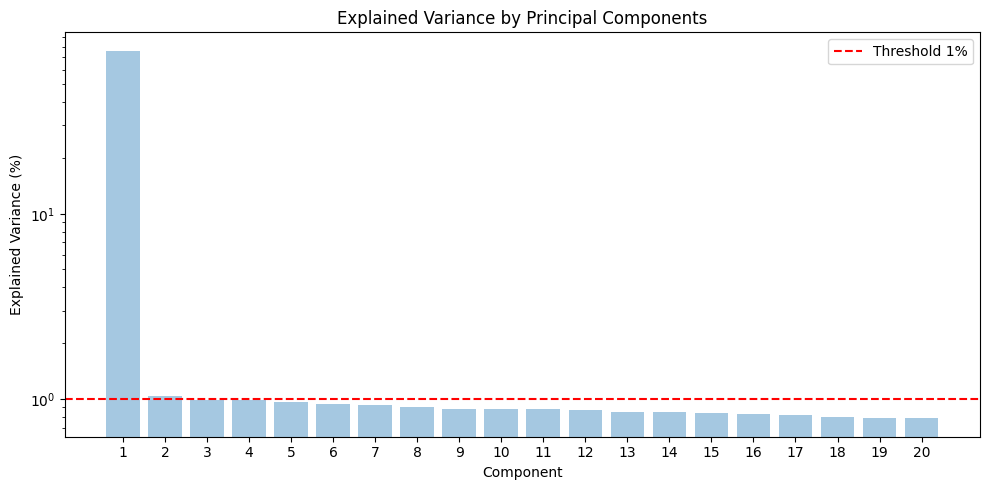

In [1]:
from utils import cal_eigen_varexp
from tensorly import random
tensor = random.random_tensor((30, 40, 50), seed=42)

fig, rank = cal_eigen_varexp(tensor, mode0=0, modes=[1, 2], varexp=1)
rank

# test 3d decompsition

In [2]:
import numpy as np
import tensorly as tl
from tensorly.tenalg import multi_mode_dot

# Dimensions
n_samples, n_features2, n_features3 = 30, 20, 15
Q = 15  # sample-level covariate dimension
rq,r2, r3 = 10,4, 4  # Tucker rank

# Sample-level covariates
X_covar1 = np.random.randn(n_samples, Q)

# Latent factor matrices (true W)
W1 = np.random.randn(Q,rq)
W2 = np.random.randn(n_features2, r2)
W3 = np.random.randn(n_features3, r3)

# Core tensor
G = np.random.randn(rq, r2, r3)


In [16]:
G.shape

(10, 4, 4)

In [4]:
W1.shape

(15, 10)

In [5]:
M_list = [W1,W2,W3]

In [6]:
B = multi_mode_dot(G,M_list,modes=[0,1,2])
B.shape


(15, 20, 15)

In [21]:
B

array([[[  6.63327383, -10.97971683,  -1.32607475, ...,   4.69131585,
          -7.38388519,  12.13144059],
        [  8.18061322,  -5.8052597 ,  -2.96474864, ...,  -7.19193011,
          -4.89968488,   0.90358734],
        [ 21.35704193, -16.02299534,  -8.15403224, ..., -12.87791478,
         -12.81055382,  10.95010692],
        ...,
        [ -4.27942027,   0.44437712,   2.37356812, ...,   6.06058169,
           0.84993697,   0.10312973],
        [-22.55464094,  22.47041765,   7.15881085, ...,  11.35615345,
          16.94673863, -13.526041  ],
        [ 17.16757966, -10.41193892,  -6.63882394, ..., -18.78866257,
          -9.22832901,  -0.90052583]],

       [[ 34.8635875 ,  -2.41276136, -19.8338877 , ...,  35.62137607,
          -6.05448543,  52.19846126],
        [ -6.51846173,  -6.34953501,   4.85264377, ...,  -9.99092622,
          -2.543131  ,  -6.19488702],
        [ 22.54534036, -14.78065245,  -8.97832055, ...,   9.63863311,
         -12.36596565,  24.04748165],
        ...,


In [7]:
from tensorly.tenalg import mode_dot
Y = mode_dot(B, X_covar1, mode=0)

In [8]:
Y.shape

(30, 20, 15)

In [9]:
noise = np.random.normal(scale=0.01, size=Y.shape)
T_noisy = Y + noise


In [10]:
from utils import staccato_3d
res = staccato_3d(tensor=T_noisy,
                  X_covar1=X_covar1,
                  core_shape=(rq, r2, r3))


In [22]:
res['C_ts']

array([[[  6.63357696, -10.98009801,  -1.32637655, ...,   4.69228181,
          -7.38388845,  12.1321251 ],
        [  8.18087921,  -5.80513318,  -2.96501348, ...,  -7.1922072 ,
          -4.89952332,   0.90395841],
        [ 21.35632832, -16.02266776,  -8.15395061, ..., -12.87796036,
         -12.80993851,  10.9496415 ],
        ...,
        [ -4.27925775,   0.44434618,   2.37346219, ...,   6.06027485,
           0.84992293,   0.10314258],
        [-22.55525659,  22.47035086,   7.15951174, ...,  11.35642858,
          16.94631028, -13.52643493],
        [ 17.16718599, -10.41118531,  -6.63890476, ..., -18.7887173 ,
          -9.22761536,  -0.90022732]],

       [[ 34.86431332,  -2.41272315, -19.83478294, ...,  35.62296577,
          -6.05458828,  52.19941793],
        [ -6.51886459,  -6.34953397,   4.85277287, ...,  -9.99194836,
          -2.54281991,  -6.19531276],
        [ 22.54480591, -14.77950321,  -8.97886394, ...,   9.63680882,
         -12.36471963,  24.04730414],
        ...,


# 构造每个region的 3D tensor

In [1]:
import json
json_path = "/projects/YangLabData/Ruilong/APE_project/valid_region_gene_map.json"
with open(json_path, 'r') as f:
        genelist = json.load(f)

In [5]:
genelist.keys()

dict_keys(['1_10583_1961168', '1_1961168_3666172', '1_3666172_4320751', '1_4320751_5853833', '1_5853833_7187275', '1_7187275_9305140', '1_9305140_10746927', '1_10746927_11717784', '1_11717784_12719464', '1_12719464_14565015', '1_14565015_16571235', '1_16571235_18336405', '1_18336405_20142656', '1_20142656_21410095', '1_21410095_22760390', '1_22760390_23594100', '1_23594100_25190354', '1_25190354_27075376', '1_27075376_29689034', '1_29689034_31973084', '1_31973084_34334157', '1_34334157_37083582', '1_37083582_38266175', '1_38266175_39734895', '1_39734895_41509656', '1_41509656_43292786', '1_43292786_44503511', '1_44503511_46433829', '1_46433829_47536904', '1_47536904_48512516', '1_48512516_49428505', '1_49428505_51248054', '1_51248054_53760589', '1_53760589_55947444', '1_56556055_58399727', '1_58399727_59424737', '1_59424737_61456693', '1_61456693_62989418', '1_62989418_64576021', '1_64576021_66473721', '1_66473721_68012212', '1_68012212_69221933', '1_69221933_70906787', '1_70906787_712

In [11]:
from utils import slice_tensor_by_region
import numpy as np
#tep 1: Load the saved 3D expression tensor
loaded = np.load("expression_tensor.npz", allow_pickle=True)
tensor_3d = loaded["tensor"]
gene_list = loaded["gene_names"].tolist()
cell_types = loaded["cell_types"].tolist()
unique_samples = loaded["sample_names"].tolist()

# Step 2: Choose a region ID and JSON path
region_id = "1_10583_1961168"
json_path = "/projects/YangLabData/Ruilong/APE_project/valid_region_gene_map.json"

# Step 3: Slice the tensor based on the region's gene list
subtensor, subgenes = slice_tensor_by_region(region_id, tensor_3d, gene_list, json_path)

print("Shape of sliced tensor:", subtensor.shape)  # (genes in region, cell types, samples)
print("Number of matched genes:", len(subgenes))
print("First 5 genes:", subgenes[:5])


tensor_3d.shape
gene_list


import pandas as pd

vcf_path = "/projects/YangLabData/Ruilong/APE_project/plink_result/1_10583_1961168/1_10583_1961168_final.raw"

# 直接读取，因为第一行已经是列名
vcf_df = pd.read_csv(vcf_path,sep=r'\s+')

# 显示前几行
vcf_df = vcf_df.fillna(vcf_df.mean(numeric_only=True))
vcf_df


len(unique_samples)
X=vcf_df.set_index("FID").iloc[:,5:]
X
subtensor
subtensor = np.transpose(subtensor, (2, 1, 0))
subtensor.shape





from utils import cal_eigen_varexp
fig, rank1 = cal_eigen_varexp(subtensor, mode0=1, modes=[0, 2], varexp=1)
fig, rank2 = cal_eigen_varexp(subtensor, mode0=2, modes=[0, 1], varexp=1)
X
design_matrix = X

design_matrix.insert(0, "intercept", 1)
design_matrix.index.name = "Sample_ID"
design_matrix





design_matrix.shape[1]

core_shape = (design_matrix.shape[1], rank1, rank2)
core_shape
from utils import TensorReg_3d
All_cov = TensorReg_3d(tensor=subtensor,
                  X_covar1=design_matrix,
                  core_shape=core_shape)
All_cov

Shape of sliced tensor: (43, 6, 415)
Number of matched genes: 43
First 5 genes: ['ACAP3', 'AGRN', 'AL645728.1', 'ANKRD65', 'ATAD3A']


/projects/YangLabData/Ruilong/APE_project/utils.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.insert(0, "intercept", 1)


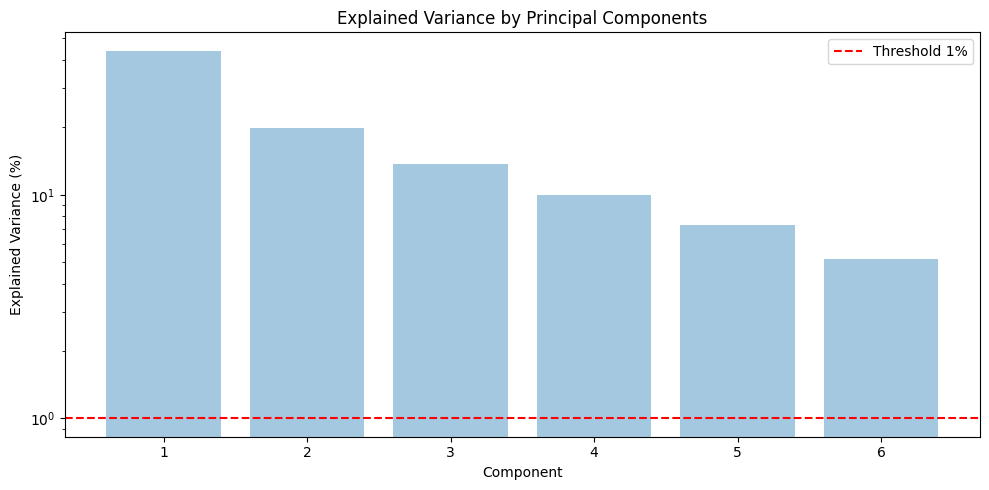

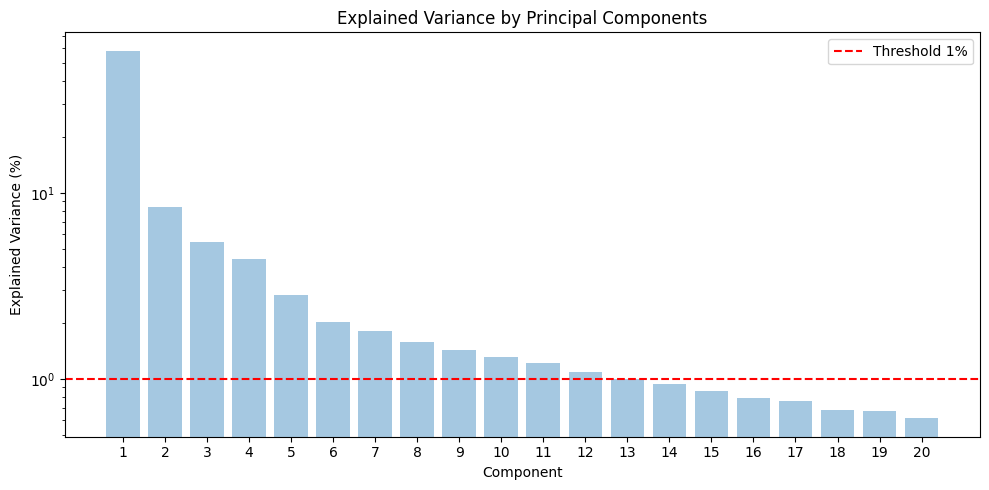

In [2]:
from utils import run_tensor_regression
region_id = "1_10583_1961168"
All_cov = run_tensor_regression(region_id)


In [3]:
All_cov

{'W': {'W1': array([[-1.12285937e-15,  9.15821696e-17,  1.91158857e-15, ...,
           9.33382610e-03, -1.48297103e-03, -9.99479840e-04],
         [ 3.35030555e-17,  2.78066151e-17, -1.19382662e-16, ...,
          -1.00139965e-02, -2.75640156e-02, -1.63504510e-02],
         [ 2.41440878e-16, -1.80540269e-16, -5.10814695e-17, ...,
          -2.08946825e-02, -1.58048313e-02, -2.68472198e-02],
         ...,
         [ 2.92651539e-17, -7.00083143e-17, -5.20320305e-17, ...,
           8.94967980e-01,  3.00450312e-02,  2.92706320e-03],
         [ 1.29270753e-17,  7.27239718e-17, -7.47481395e-17, ...,
           2.84786944e-02,  8.81593525e-01, -9.89722948e-03],
         [ 8.75513914e-17, -2.90689766e-17, -1.19282745e-16, ...,
          -1.68692343e-02,  1.19100569e-02,  9.06129687e-01]]),
  'W2': array([[ 0.58208249, -0.45706633,  0.34903392, -0.52453299, -0.17952564,
           0.15192547],
         [ 0.3463776 , -0.2092755 , -0.42478961,  0.25403396, -0.44368222,
          -0.62800713],
 

What to do next:

1; get snps information of all the samples.
3; Find the genes within the given LD region
3; redefine the region(first gene-1mb, last gene+1mb)
4; find the snps within the region
5; do tensor regression
6; 5fold and get the Rsquare 

the WGS VCF files I used for training is under "/projects/YangLabData/rparrish/ROSMAP_WGS/genotype/"  with file names like CHR${chr}_ROSMAP_WGS_b38_lifted_TIGAR.vcf.gz .

the WGS VCF files I used for training is under "/projects/YangLabData/rparrish/ROSMAP_WGS/genotype/"  with file names like CHR1_ROSMAP_WGS_b38_lifted_TIGAR.vcf.gz .

the WGS VCF files I used for training is under "/projects/YangLabData/rparrish/ROSMAP_WGS/genotype/"  with file names like CHR${chr}_ROSMAP_WGS_b38_lifted_TIGAR.vcf.gz .